<a href="https://colab.research.google.com/github/Karthikard/ML/blob/main/k_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving income.xlsx to income.xlsx


In [22]:
import pandas as pd
df = pd.read_excel('income.xlsx')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

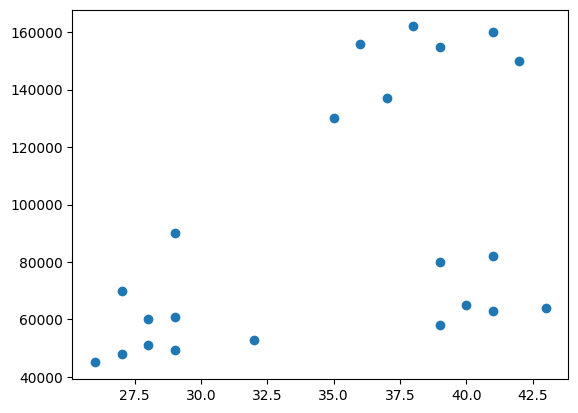

In [24]:
plt.scatter(df.Age,df['Income($)'])

In [25]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [26]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [27]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


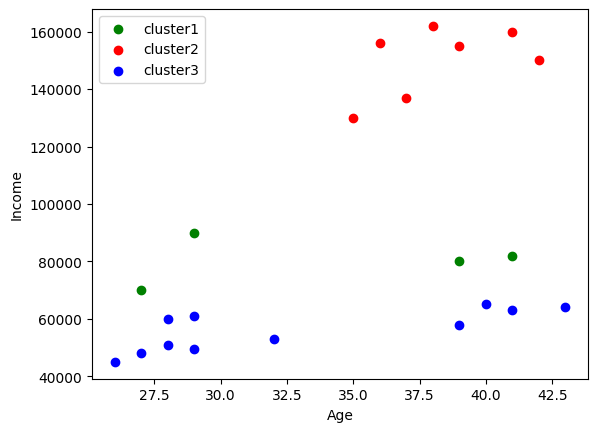

In [28]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'] , color = 'green' , label='cluster1')
plt.scatter(df2.Age,df2['Income($)'] , color = 'red' , label='cluster2')
plt.scatter(df3.Age,df3['Income($)'] , color = 'blue' , label='cluster3')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()





The diagram cannot be classified into proper cluster. Thus the values in axis can be altered for proper alignment.

In [29]:
#scaler transforms values to the range [0, 1].
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])  #Finds the min and max of the Income($) column to prepare for scaling
df['Income($)'] = scaler.transform(df[['Income($)']]) #Every value in the Income($) column is now between 0 and 1.
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [30]:
scaler1 = MinMaxScaler()
scaler1.fit(df[['Age']])
df['Age'] = scaler1.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [43]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


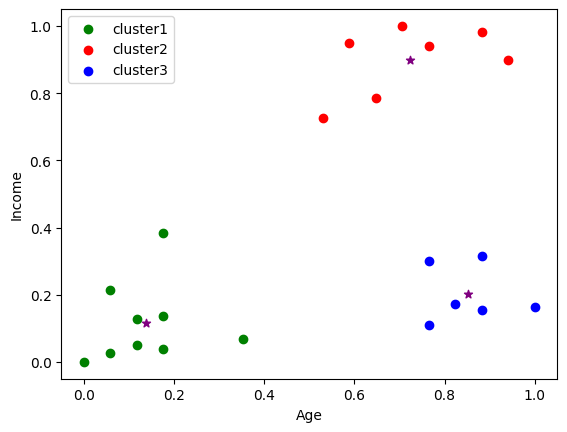

In [48]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'] , color = 'green' , label='cluster1')
plt.scatter(df2.Age,df2['Income($)'] , color = 'red' , label='cluster2')
plt.scatter(df3.Age,df3['Income($)'] , color = 'blue', label = 'cluster3')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

#to find centroid
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.show()



In [45]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [49]:
#errror
k_rng = range(1,10)
sse =[]
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

In [50]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.42015522057314425,
 0.2860717106689441,
 0.26016449151412036,
 0.18777447445785067,
 0.14970136993619093,
 0.13483502316199802]

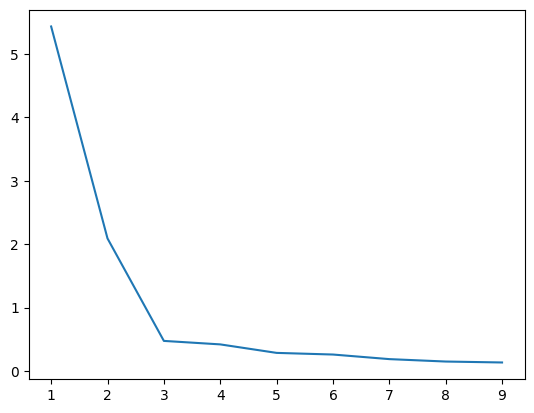

In [51]:
plt.plot(k_rng,sse)

from above it is understandable 3 cluester is best choice. [elbow method]